In [11]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
%matplotlib inline

Read in relations file

In [12]:
pos_df = pd.read_csv('/homes/fabadmus/Internship/grad_project/pos_file')
neg_df = pd.read_csv('/homes/fabadmus/Internship/grad_project/neg_file')

In [13]:
# full_df = pd.concat([pos_df, neg_df],ignore_index=True)
full_df = pd.read_csv('/homes/fabadmus/Internship/grad_project/labeled_file')
full_df

,Unnamed: 0,subject,object,local_mi,label
0,0,TWDIS_06685,TWMET_00170,1339276,POS
1,1,TWDIS_06685,TWMET_00012,585216,POS
2,2,TWDIS_06685,TWMET_01157,85320,POS
3,4,TWDIS_06685,TWMET_00848,12796,POS
4,6,TWDIS_06685,TWMET_00037,8200,POS
...,...,...,...,...,...
114,243,TWDIS_09015,TWMET_00101,104,NEG
115,244,TWDIS_09015,TWMET_00415,104,NEG
116,245,TWDIS_09015,TWMET_01030,104,NEG
117,246,TWDIS_09015,TWMET_00410,103,NEG


In [14]:
second_layer = pd.read_csv('/homes/fabadmus/Internship/grad_project/second_layer')
second_layer

,Unnamed: 0,subject,object,local_mi
0,0,TWDIS_06685,TWMET_00170,1339276
1,1,TWDIS_06685,TWMET_00012,585216
2,2,TWDIS_06685,TWMET_01157,85320
3,3,TWDIS_06685,TWMET_00848,12796
4,4,TWDIS_06685,TWMET_00037,8200
...,...,...,...,...
784,784,TWMET_01228,TWMET_00188,55755
785,785,TWMET_01229,TWMET_00585,926694
786,786,TWMET_01230,TWMET_01233,5461
787,787,TWMET_01232,TWMET_01233,33626


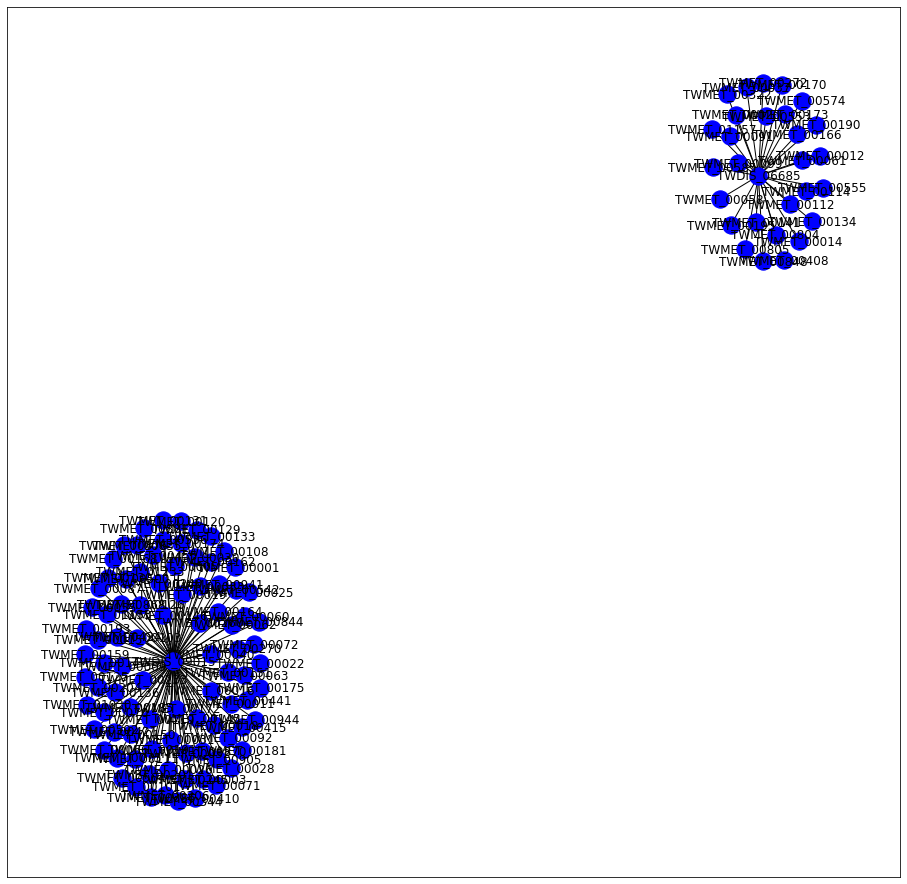

In [15]:
g = nx.from_pandas_edgelist(full_df, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')
plt.figure(5, figsize=(16, 16))
pos =nx.spring_layout(g)
nx.draw_networkx(g, node_color="blue" , pos=pos, with_labels = True)

In [16]:
# convert the second_layer into a graph
G = nx.from_pandas_edgelist(second_layer, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')


In [ ]:
# # plot the graph
# plt.figure(10, figsize=(20, 20))

# pos =nx.spring_layout(G)
# nx.draw_networkx(G, node_color="blue" , pos=pos, with_labels = True, )

# # nx.draw_networkx_edge_labels(G, 
# # edge_labels=nx.get_edge_attributes(G, 'local_mi'),
# # font_color="red",
# # );
# plt.show()

In [17]:
nodes = list(G.nodes)

# nodes.remove([i for i in nodes if i.startswith('TWDIS')])

sources = [i for i in nodes if i.startswith('TWDIS')]

for i in sources:
    nodes.remove(i)

In [19]:
len(nodes)

687

In [20]:

# load the embeddings of the graph

embeddings = Word2Vec.load('embedding')

# Convert embeddings to dataframe

emb_df = (pd.DataFrame([embeddings.wv.get_vector(str(n))

                        for n in nodes], index=nodes))

#emb_df = (pd.DataFrame([embeddings.wv.get_vector]))

emb_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TWMET_00170,-0.593178,-0.339729,0.692061,0.169612,-0.619460,-0.007835,0.754003,0.504258,0.395930,0.165630,0.110256,-0.150359,0.536764,1.213835,-0.037042,-0.029586
TWMET_00012,-0.187133,-0.205052,0.152490,-0.246708,0.033786,0.293729,-0.568949,0.169117,0.143684,0.226174,0.115873,0.560375,-0.169760,0.116213,0.263625,-0.427089
TWMET_01157,-0.599189,-3.327970,0.731612,1.370553,1.574323,0.950032,-0.002643,1.694282,-2.527605,-1.667475,3.880275,2.467014,0.367110,3.180144,-0.751935,-0.465165
TWMET_00848,-2.656803,-1.750591,-4.002403,-1.797902,-0.372243,-1.540004,-2.220790,-3.509126,-1.311748,2.299629,0.144968,-0.790305,-2.075360,4.124889,0.788186,-0.785964
TWMET_00037,-1.166337,-0.295737,-0.364667,-0.120508,-0.593522,0.320910,0.665998,-0.256417,-1.724633,-0.483875,0.479565,1.114315,-1.276520,-0.360427,0.784230,-0.466881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TWMET_01209,-0.177773,-0.136766,-0.065984,-0.133483,-0.061254,-0.028652,0.010042,-0.081384,-0.051233,0.192640,-0.003336,0.015143,-0.134756,-0.064832,-0.240893,0.025036
TWMET_01214,-1.437575,-2.637336,0.562821,-0.923127,0.995302,-1.975699,-0.623870,2.147383,-4.538274,1.310730,-0.825839,-0.561322,-1.417153,-1.007478,0.232100,0.416306
TWMET_01219,-0.350685,-0.264077,-0.249767,-0.045332,0.045425,-0.066347,-0.133983,0.072694,-0.357605,0.141969,-0.007721,0.281994,0.020091,0.058533,0.204830,0.128963
TWMET_01229,-0.957566,-2.335763,0.273795,-0.468789,-0.960247,0.766704,0.906470,0.970293,-0.010145,0.962296,0.286270,0.528598,0.492207,2.505688,0.404575,1.490244


In [21]:
emb_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TWMET_01209,-0.177773,-0.136766,-0.065984,-0.133483,-0.061254,-0.028652,0.010042,-0.081384,-0.051233,0.192640,-0.003336,0.015143,-0.134756,-0.064832,-0.240893,0.025036
TWMET_01214,-1.437575,-2.637336,0.562821,-0.923127,0.995302,-1.975699,-0.623870,2.147383,-4.538274,1.310730,-0.825839,-0.561322,-1.417153,-1.007478,0.232100,0.416306
TWMET_01219,-0.350685,-0.264077,-0.249767,-0.045332,0.045425,-0.066347,-0.133983,0.072694,-0.357605,0.141969,-0.007721,0.281994,0.020091,0.058533,0.204830,0.128963
TWMET_01229,-0.957566,-2.335763,0.273795,-0.468789,-0.960247,0.766704,0.906470,0.970293,-0.010145,0.962296,0.286270,0.528598,0.492207,2.505688,0.404575,1.490244
TWMET_01230,-0.056585,-0.086983,-0.044688,0.041088,-0.073580,0.022529,0.031312,0.001040,-0.106143,0.012808,0.010764,-0.000967,-0.021899,0.026364,0.036667,-0.006017


In [22]:
# get set of positive and negative concepts from the full data
pos = set(full_df[full_df['label'] == 'POS'].object)
neg = set(full_df[full_df['label'] == 'NEG'].object)

In [23]:
# create separate dataframes of embeddings bases on the sets
emb_df_pos = emb_df[emb_df.index.isin(pos)]
emb_df_pos['set'] = 'POS'
emb_df_neg = emb_df[emb_df.index.isin(neg)]
emb_df_neg['set'] = 'NEG'

/tmp/ipykernel_1123928/3669145909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emb_df_pos['set'] = 'POS'
/tmp/ipykernel_1123928/3669145909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emb_df_neg['set'] = 'NEG'


In [24]:
# inspecting
emb_df_pos.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00170,-0.593178,-0.339729,0.692061,0.169612,-0.619460,-0.007835,0.754003,0.504258,0.395930,0.165630,0.110256,-0.150359,0.536764,1.213835,-0.037042,-0.029586,POS
TWMET_00012,-0.187133,-0.205052,0.152490,-0.246708,0.033786,0.293729,-0.568949,0.169117,0.143684,0.226174,0.115873,0.560375,-0.169760,0.116213,0.263625,-0.427089,POS
TWMET_01157,-0.599189,-3.327970,0.731612,1.370553,1.574323,0.950032,-0.002643,1.694282,-2.527605,-1.667475,3.880275,2.467014,0.367110,3.180144,-0.751935,-0.465165,POS
TWMET_00848,-2.656803,-1.750591,-4.002403,-1.797902,-0.372243,-1.540004,-2.220790,-3.509126,-1.311748,2.299629,0.144968,-0.790305,-2.075360,4.124889,0.788186,-0.785964,POS
TWMET_00037,-1.166337,-0.295737,-0.364667,-0.120508,-0.593522,0.320910,0.665998,-0.256417,-1.724633,-0.483875,0.479565,1.114315,-1.276520,-0.360427,0.784230,-0.466881,POS


In [25]:
emb_df_neg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00191,0.019025,-0.040118,-0.032094,-0.014648,-0.009327,-0.135607,-0.196830,-0.043102,0.136444,0.029063,-0.008303,0.068660,0.078996,-0.042623,-0.011207,0.058167,NEG
TWMET_00111,-1.050271,-0.516040,-0.593056,0.215024,-0.426373,0.496099,0.717061,0.093347,-1.760345,0.011090,0.657522,0.698972,-1.089320,-0.379552,0.825091,-0.539195,NEG
TWMET_00022,-0.522331,-0.175435,-0.376608,-0.258681,-0.162582,0.320948,0.448356,-0.130797,-0.807773,-0.025690,0.277930,0.472770,-0.396971,-0.362476,0.362830,-0.135745,NEG
TWMET_00016,-0.135261,-0.521145,-0.096538,-0.403401,-0.336881,-0.450069,-0.295276,0.081279,-0.126364,-0.332970,-0.313235,-0.138037,-0.505333,-0.047874,0.000102,0.354914,NEG
TWMET_00185,-0.745678,-0.919998,0.172230,-0.165506,0.078593,-0.285054,-0.688637,0.590977,-0.494195,-0.638342,-0.378135,0.368636,0.040633,0.976394,0.193494,0.439651,NEG


In [26]:
# inspecting
print(len(emb_df_pos))
print(len(emb_df_neg))

28
91


In [76]:
# create a dataframe for the training from the labeled concepts
model_df = pd.concat([emb_df_pos, emb_df_neg])
model_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00170,-0.593178,-0.339729,0.692061,0.169612,-0.619460,-0.007835,0.754003,0.504258,0.395930,0.165630,0.110256,-0.150359,0.536764,1.213835,-0.037042,-0.029586,POS
TWMET_00012,-0.187133,-0.205052,0.152490,-0.246708,0.033786,0.293729,-0.568949,0.169117,0.143684,0.226174,0.115873,0.560375,-0.169760,0.116213,0.263625,-0.427089,POS
TWMET_01157,-0.599189,-3.327970,0.731612,1.370553,1.574323,0.950032,-0.002643,1.694282,-2.527605,-1.667475,3.880275,2.467014,0.367110,3.180144,-0.751935,-0.465165,POS
TWMET_00848,-2.656803,-1.750591,-4.002403,-1.797902,-0.372243,-1.540004,-2.220790,-3.509126,-1.311748,2.299629,0.144968,-0.790305,-2.075360,4.124889,0.788186,-0.785964,POS
TWMET_00037,-1.166337,-0.295737,-0.364667,-0.120508,-0.593522,0.320910,0.665998,-0.256417,-1.724633,-0.483875,0.479565,1.114315,-1.276520,-0.360427,0.784230,-0.466881,POS


In [72]:
# model_df.reset_index(inplace = True)

In [77]:
# assign the independent and dependent variables
X = model_df.iloc[:,:-1]
y = model_df['set'].values

In [78]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42) 
# fit model
model1 = RandomForestClassifier(random_state=42)

model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf = StratifiedKFold (n_splits=3, shuffle=True, random_state=42)
model2 = RandomForestClassifier(random_state=0)
score = cross_val_score(model2, X, y, cv= skf, scoring="accuracy")
model2.fit(X_test, y_test)

RandomForestClassifier(random_state=0)

In [98]:
print(f'Scores for each fold are: {score}')

Scores for each fold are: [0.75       0.65       0.82051282]


/commons/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


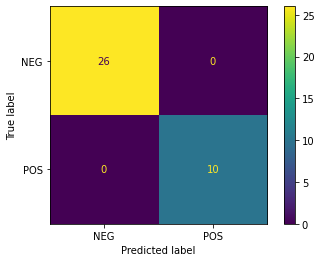

In [99]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model2, X_test, y_test)
plt.show()

In [100]:
pred2 = model2.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

         NEG       1.00      1.00      1.00        26
         POS       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [35]:
# make predictions
pred = model1.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         NEG       0.76      1.00      0.87        26
         POS       1.00      0.20      0.33        10

    accuracy                           0.78        36
   macro avg       0.88      0.60      0.60        36
weighted avg       0.83      0.78      0.72        36



/commons/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


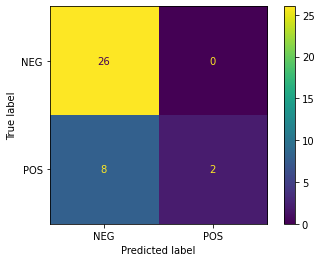

In [86]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, y_test)
plt.show()

/commons/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


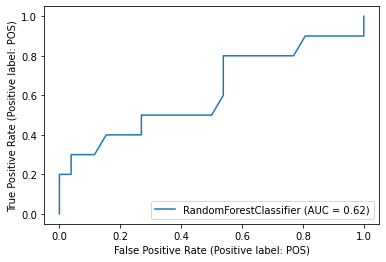

In [37]:
metrics.plot_roc_curve(model1, X_test, y_test)

In [38]:
# predicting the whole model data with the model
predictions = model1.predict(X)

In [39]:
# get the prediction probabilities of the model data
predict_proba = model1.predict_proba(X)
# predict_proba

In [40]:
# convert predictions and actual values to dataframe
predict_proba_df = pd.DataFrame(predict_proba, index=X.index,
                                columns=['NEG_prob', 'POS_prob'])
predict_proba_df['predictions'] = predictions
predict_proba_df['actual_values'] = model_df['set']
predict_proba_df

,NEG_prob,POS_prob,predictions,actual_values
TWMET_00170,0.47,0.53,POS,POS
TWMET_00012,0.19,0.81,POS,POS
TWMET_01157,0.17,0.83,POS,POS
TWMET_00848,0.24,0.76,POS,POS
TWMET_00037,0.88,0.12,NEG,POS
...,...,...,...,...
TWMET_00101,0.97,0.03,NEG,NEG
TWMET_00415,0.81,0.19,NEG,NEG
TWMET_01030,0.92,0.08,NEG,NEG
TWMET_00410,0.77,0.23,NEG,NEG


In [41]:
# create validation data from the embedding data
validation_df = pd.concat([emb_df_pos, emb_df_neg, emb_df]).drop_duplicates(
    subset=emb_df.columns[:-1], keep=False)
validation_df = validation_df[validation_df.index.str.startswith('TWDIS') == False]
validation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00002,-1.794681,-0.500730,-0.525463,0.175803,-0.635109,0.549413,1.046986,-0.105702,-2.270308,-0.600182,0.889024,1.305053,-1.790810,-0.525883,1.424342,-0.579767,NaN
TWMET_01224,-2.526045,1.685951,-1.453125,-1.228801,1.695866,1.509111,-0.490507,4.871932,-6.113264,1.103791,-1.896246,1.600197,-0.205856,4.187672,0.199418,1.386206,NaN
TWMET_00004,-1.520222,-0.493122,-1.148103,0.054088,-0.429965,0.726202,0.883809,-0.421037,-2.143343,-0.563573,0.502538,1.445122,-1.779043,-0.416725,0.922552,-0.527819,NaN
TWMET_00006,-0.690389,-0.330246,-0.214688,-0.068933,0.006349,0.102230,0.509958,-0.000915,-1.283763,-0.034618,0.450196,0.596880,-0.805819,-0.160455,0.473350,-0.275602,NaN
TWMET_00007,-0.228900,-0.208483,-0.089918,-0.019289,0.042004,0.060176,-0.010602,-0.019645,-0.311686,-0.022445,0.117115,0.146089,-0.094539,0.039358,0.064956,-0.026826,NaN


In [42]:
# create copy of df
val_df = validation_df.copy()
val_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00002,-1.794681,-0.500730,-0.525463,0.175803,-0.635109,0.549413,1.046986,-0.105702,-2.270308,-0.600182,0.889024,1.305053,-1.790810,-0.525883,1.424342,-0.579767,NaN
TWMET_01224,-2.526045,1.685951,-1.453125,-1.228801,1.695866,1.509111,-0.490507,4.871932,-6.113264,1.103791,-1.896246,1.600197,-0.205856,4.187672,0.199418,1.386206,NaN
TWMET_00004,-1.520222,-0.493122,-1.148103,0.054088,-0.429965,0.726202,0.883809,-0.421037,-2.143343,-0.563573,0.502538,1.445122,-1.779043,-0.416725,0.922552,-0.527819,NaN
TWMET_00006,-0.690389,-0.330246,-0.214688,-0.068933,0.006349,0.102230,0.509958,-0.000915,-1.283763,-0.034618,0.450196,0.596880,-0.805819,-0.160455,0.473350,-0.275602,NaN
TWMET_00007,-0.228900,-0.208483,-0.089918,-0.019289,0.042004,0.060176,-0.010602,-0.019645,-0.311686,-0.022445,0.117115,0.146089,-0.094539,0.039358,0.064956,-0.026826,NaN


In [ ]:
# # get set of positive and negative concepts from the second layer data
# pos_second = set(second_layer[second_layer['subject'] == 'TWDIS_06685'].object)
# neg_second = set(second_layer[second_layer['subject'] ==  'TWDIS_09015'].object)
# print(neg_second)
# # label validation_df

# # mask = val_df[val_df.index.isin(pos_second)]

# # val_df.loc[mask, 'set'] = 'POS'
# val_df['set'].loc[val_df.index.isin (pos_second)] = 'POS'


: 

In [ ]:
#val_df['set'].loc[val_df.index.isin (neg_second)] = 'NEG'

: 

In [43]:
# validation_df['set'][(validation_df.index.isin(neg_second))] = 'NEG'
val_df.set.nunique()

0

In [44]:
# make predictions on the unknown
X_val = val_df.iloc[:,:-1]

pred = model1.predict(X_val)


In [45]:
# get the prediction probabilities of the model data
val_proba = model1.predict_proba(X_val)
# val_proba

In [46]:
# convert predictions and actual values to dataframe
val_proba_df = pd.DataFrame(val_proba, index=X_val.index,
                                columns=['NEG_prob', 'POS_prob'])
val_proba_df['predictions'] = pred
val_proba_df = val_proba_df.sort_values('POS_prob', ascending=False)
val_proba_df

,NEG_prob,POS_prob,predictions
TWMET_00453,0.29,0.71,POS
TWMET_00492,0.29,0.71,POS
TWMET_00176,0.31,0.69,POS
TWMET_00764,0.31,0.69,POS
TWMET_00254,0.31,0.69,POS
...,...,...,...
TWMET_00706,1.00,0.00,NEG
TWMET_00751,1.00,0.00,NEG
TWMET_00824,1.00,0.00,NEG
TWMET_00852,1.00,0.00,NEG


In [49]:
len(val_proba_df[val_proba_df.predictions == 'POS'])

24

In [102]:
import requests
session = requests.Session()
base_url = 'https://apimlqv2.tenwiseservice.nl/api/mlquery/'
session.headers['referer'] = 'https://apimlqv2.tenwiseservice.nl'
session.get(f"{base_url}start/")

payload = {'apikey': '',
           'csrfmiddlewaretoken': session.cookies.get_dict()['csrftoken']}

# annotate predictions
ids = list(val_proba_df.index)
payload['concept_ids'] = ",".join(ids)
results = session.post(f"{base_url}conceptset/annotation/", payload)
js = results.json()
annotation = js['result']['annotation']
# get ids
annotated_ids = []
for id in ids:
    annotated_ids.extend(annotation[id]['name'])
# add ids to the dataframe
val_proba_df['annotation'] = annotated_ids
val_proba_df.head(10)

,NEG_prob,POS_prob,predictions,annotation
TWMET_00717,0.18,0.82,POS,3-methoxytyramine
TWMET_00176,0.23,0.77,POS,n-acetylcysteine
TWMET_01208,0.23,0.77,POS,tocopherol acetate
TWMET_01222,0.27,0.73,POS,urethane
TWMET_00529,0.27,0.73,POS,semialdehyde
TWMET_01041,0.33,0.67,POS,menthol
TWMET_01224,0.34,0.66,POS,ursodeoxycholic acid
TWMET_00034,0.34,0.66,POS,aspartate
TWMET_01141,0.35,0.65,POS,pyrazole
TWMET_00856,0.36,0.64,POS,cholic acid


In [106]:
metabs = val_proba_df[['POS_prob', 'annotation']].head(10)
pd.DataFrame.to_csv(metabs, '/homes/fabadmus/Internship/result1.tsv', sep='\t') 

Choosing second Second_layer 

In [11]:
full_second_layer = pd.read_csv('/homes/fabadmus/Internship/test_file')
full_second_layer.head()

,Unnamed: 0,subject,predicate,object,overlap,score,local_mi
0,0,TWMET_00001,REL_9999,TWMET_00001,535243,47,25156421
1,1,TWMET_00001,REL_9999,TWMET_00002,63340,5,316700
2,2,TWMET_00001,REL_9999,TWMET_00003,42063,7,294441
3,3,TWMET_00001,REL_9999,TWMET_00004,33413,6,200478
4,4,TWMET_00001,REL_9999,TWMET_00005,3694,1,3694


In [12]:
full_second_layer = full_second_layer[['subject', 'object', 'score', 'overlap','local_mi']]
full_second_layer = full_second_layer[full_second_layer['score'] >= 1]
full_second_layer= full_second_layer[full_second_layer['overlap'] >= 100].reset_index(drop=True)
full_second_layer= full_second_layer.drop(columns = ['score', 'overlap'])
# full_second_layer.sort_values('local_mi', ascending=False, inplace=True)
# filter out self loops
full_second_layer= full_second_layer[full_second_layer['subject'] != full_second_layer['object']]
# remove duplicates since relations always goes both ways
full_second_layer = full_second_layer.iloc[::2]



,subject,object,local_mi
1,TWMET_00001,TWMET_00002,316700
3,TWMET_00001,TWMET_00004,200478
5,TWMET_00001,TWMET_00006,5351
7,TWMET_00001,TWMET_00008,2826
9,TWMET_00001,TWMET_00010,28920
...,...,...,...
35760,TWMET_01233,TWMET_01140,321
35762,TWMET_01233,TWMET_01152,143
35764,TWMET_01233,TWMET_01154,342
35766,TWMET_01233,TWMET_01174,351


In [13]:
# get relations with the highest local_mi
full_second_layer= full_second_layer.groupby(['subject'])[['object', 'local_mi']].max().reset_index()
full_second_layer

,subject,object,local_mi
0,TWMET_00001,TWMET_01233,316700
1,TWMET_00002,TWMET_01232,1859958
2,TWMET_00003,TWMET_01232,294441
3,TWMET_00004,TWMET_01232,1188188
4,TWMET_00005,TWMET_01232,509775
...,...,...,...
691,TWMET_01227,TWMET_01116,169824
692,TWMET_01228,TWMET_01004,249064
693,TWMET_01229,TWMET_00585,926694
694,TWMET_01232,TWMET_01233,202575


In [80]:
from heapq import nlargest
full_second_layer = full_second_layer[full_second_layer.subject.str.startswith('TWDIS') == False].reset_index()

# full_second_layer.sort_values(['object', 'local_mi'],ascending=False).groupby(['subject']).head(3)

In [82]:
full_second_layer.groupby(['subject', 'object'])[['local_mi']].max()

local_mi
subject     object               
TWMET_00001 TWMET_00002    316700
            TWMET_00003    294441
            TWMET_00004    200478
            TWMET_00005      3694
            TWMET_00006      5351
...                           ...
TWMET_01233 TWMET_01173       309
            TWMET_01174       351
            TWMET_01202       400
            TWMET_01230      5461
            TWMET_01232      3198

[11842 rows x 1 columns]

In [121]:
# full_second_layer.groupby(['subject'])[['object', 'local_mi']].nlargest(2)
full_second_layer.groupby(['subject']).apply(lambda x: x.sort_values(['local_mi'], ascending = False)[:2])

index  Unnamed: 0      subject       object  local_mi
subject                                                                
TWMET_00001 143     262         262  TWMET_00001  TWMET_00011    584080
            174     293         293  TWMET_00001  TWMET_00411    466026
TWMET_00003 18      137         137  TWMET_00003  TWMET_00011   4352940
            38      157         157  TWMET_00003  TWMET_00002   1859958
TWMET_00005 158     277         277  TWMET_00005  TWMET_00026    531144
...                 ...         ...          ...          ...       ...
TWMET_01153 193     312         312  TWMET_01153  TWMET_00844    432150
TWMET_01157 738     857         857  TWMET_01157  TWMET_00194     61875
            771     890         890  TWMET_01157  TWMET_00555     57750
TWMET_01233 949    1068        1068  TWMET_01233  TWMET_00092     41488
            1172   1291        1291  TWMET_01233  TWMET_00369     27970

[238 rows x 5 columns]